# Tanzanian Water Wells: Predicting Water Well Functionality with Machine Learning


## Business Understanding

### Background
Tanzania, a developing nation with a population exceeding 57 million, faces ongoing challenges in providing clean and reliable water to its citizens. While thousands of water points have been established across the country, a significant number of them are either **non-functional** or **in need of repair** due to age, poor construction, lack of maintenance, or mismanagement.

Water well functionality is essential for public health, agriculture, education, and economic stability, particularly in rural areas. Identifying failing or soon-to-fail water points in advance can help prioritize maintenance and inform future water infrastructure development.

### Problem Statement
Access to clean and safe water remains a critical challenge in Tanzania, particularly in rural areas where communities rely on manually drilled wells and pumps. However, many of these water sources become non-functional or fall into disrepair due to factors such as poor construction, aging infrastructure, or lack of maintenance.

This project aims to develop a **machine learning classification model** that predicts the **functional status** of a water well using features such as its location, type of pump, installation year, and management. The target classes are:
- `functional`
- `functional needs repair`
- `non functional`

By identifying wells that are likely to fail or need repair, the model will help:
- **Government agencies** prioritize maintenance efforts.
- **NGOs and humanitarian organizations** direct resources more effectively.
- **Engineers and planners** make informed decisions about building future wells.

The successful deployment of this model could enhance water access and improve quality of life for millions of Tanzanians.

### Objective
The goal is to build a predictive model that classifies the current condition of each water point. This model will be evaluated using standard classification metrics and will provide insights into the most important factors contributing to well failure.

### Stakeholders
- **Government of Tanzania:** to use the model for better planning and resource allocation.
- **NGOs and Non-Profits:** to locate non-functional wells and prioritize repair or replacement.
- **Data Scientists and Engineers:** to uncover patterns and improve predictive strategies.


##  Data Understanding

The dataset provided consists of information collected from thousands of water wells across Tanzania. The goal is to understand the structure, content, and quality of the data before any preprocessing or modeling is done.

###  Files Provided:
1. **Training Set Values** (`Training_set_values.csv`): Contains the features (independent variables) for each water well, such as location, pump type, construction year, etc.
2. **Training Set Labels** (`Training_set_labels.csv`): Contains the target label (dependent variable) for each well—its operational status.
3. **Test Set Values** (`Test_set_values.csv`): Unlabeled dataset with the same structure as the training set values, used to test our trained model.

###  Objective at this Stage:
- Load and inspect the data.
- Understand the size, types, and distributions of columns.
- Check for missing values and inconsistencies.
- Merge the training values and labels for exploratory analysis.


In [7]:
#  Import libraries
import pandas as pd

#  Load the datasets
train_values = pd.read_csv("data/training_set_values.csv")
train_labels = pd.read_csv("data/training_set_labels.csv")
test_values = pd.read_csv("data/test_set_values.csv")



In [9]:
# Display shapes of the datasets
print("Train values shape:", train_values.shape)
print("Train labels shape:", train_labels.shape)
print("Test values shape:", test_values.shape)


Train values shape: (59400, 40)
Train labels shape: (59400, 2)
Test values shape: (14850, 40)


In [12]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [11]:
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [14]:
# Merge training values and labels
train_data = pd.merge(train_values, train_labels, on="id")

# Preview the merged training dataset
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional




- The types of features (numeric, categorical, text)
- The presence of missing or inconsistent values
- The distribution of the target labels




In [17]:
# Check data types of all columns
train_data.dtypes.value_counts()


object     31
int64       7
float64     3
Name: count, dtype: int64

In [25]:
# Check number of unique values in each column
unique_vals = train_data.nunique().sort_values()
print("Unique values per column:\n", unique_vals)


Unique values per column:
 recorded_by                  1
public_meeting               2
permit                       2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
payment_type                 7
payment                      7
extraction_type_class        7
waterpoint_type              7
source_type                  7
water_quality                8
basin                        9
source                      10
scheme_management           11
management                  12
extraction_type_group       13
extraction_type             18
district_code               20
region                      21
region_code                 27
construction_year           55
num_private                 65
amount_tsh                  98
lga                        125
date_recorded              356
population                1049
funder      

In [21]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)


Missing values:
 funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64


<Axes: title={'center': 'Distribution of Well Status'}, xlabel='status_group'>

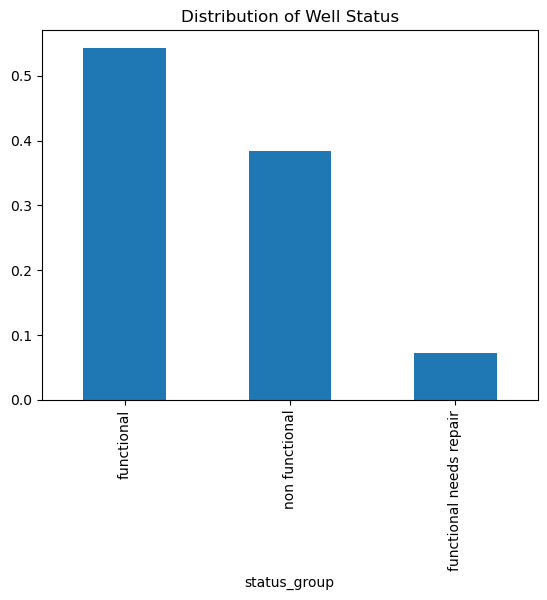

In [23]:
# Check distribution of the target variable (status_group)
train_data['status_group'].value_counts(normalize=True).plot(kind='bar', title='Distribution of Well Status')